<a href="https://colab.research.google.com/github/painterV/some_coding/blob/main/20230523_regression_gzpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [4]:

# 读取训练集和验证集数据
ori_train_data = pd.read_csv('zgpa_train.csv')
ori_test_data = pd.read_csv('zgpa_test.csv')



# 展示原始数据示例和统计信息
print("训练集数据示例：")
print(ori_train_data.head())
print("\n训练集数据统计信息：")
print(ori_train_data.describe().transpose())
print("\n验证集数据示例：")
print(ori_test_data.head())
print("\n验证集数据统计信息：")
print(ori_test_data.describe().transpose())

训练集数据示例：
       date   open   high    low  close      volume
0  2016/1/4  30.57  30.57  28.63  28.78  70997200.0
1  2016/1/5  28.41  29.54  28.23  29.23  87498504.0
2  2016/1/6  29.03  29.39  28.73  29.26  48012112.0
3  2016/1/7  28.73  29.25  27.73  28.50  23647604.0
4  2016/1/8  28.73  29.18  27.63  28.67  98239664.0

训练集数据统计信息：
        count          mean           std          min           25%  \
open    708.0  4.461119e+01  1.608129e+01        23.43  2.968000e+01   
high    709.0  4.523251e+01  1.640571e+01        23.88  2.998000e+01   
low     709.0  4.404303e+01  1.574728e+01        22.54  2.945000e+01   
close   710.0  4.467865e+01  1.609441e+01        23.69  2.964500e+01   
volume  710.0  6.306181e+07  3.567440e+07  12768281.00  3.739482e+07   

                 50%           75%           max  
open    4.397000e+01  6.030750e+01  7.663000e+01  
high    4.448000e+01  6.119000e+01  7.761000e+01  
low     4.318000e+01  5.964000e+01  7.462000e+01  
close   4.386500e+01  6.044500

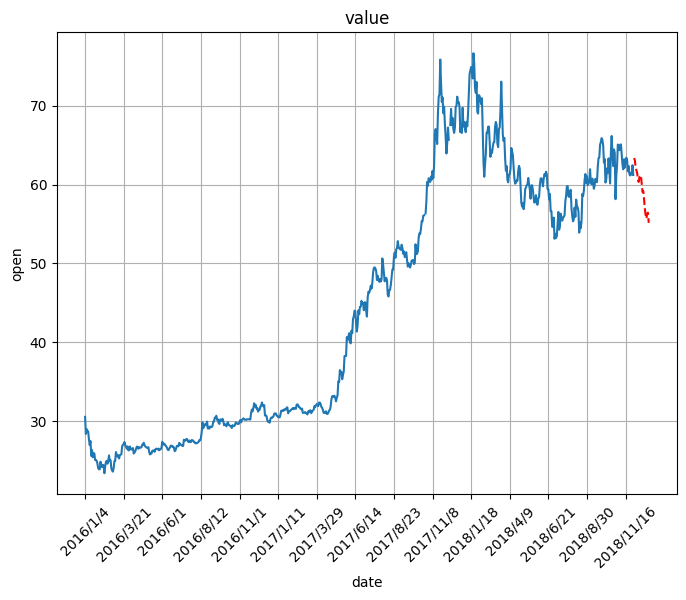

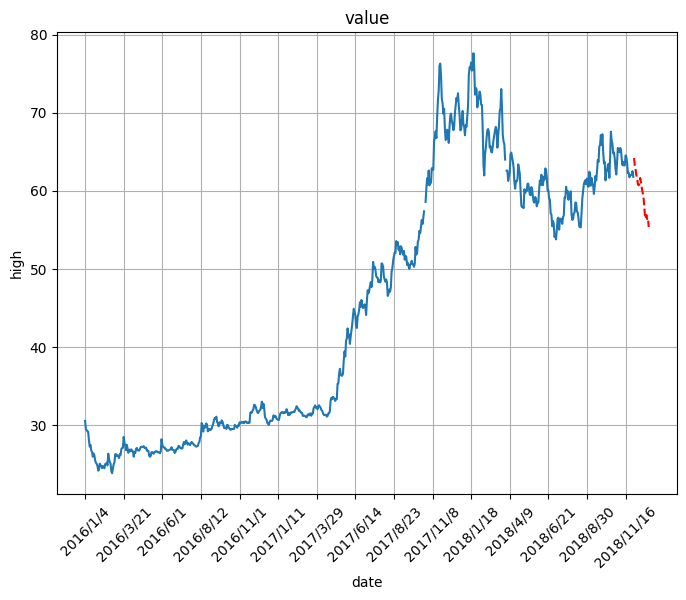

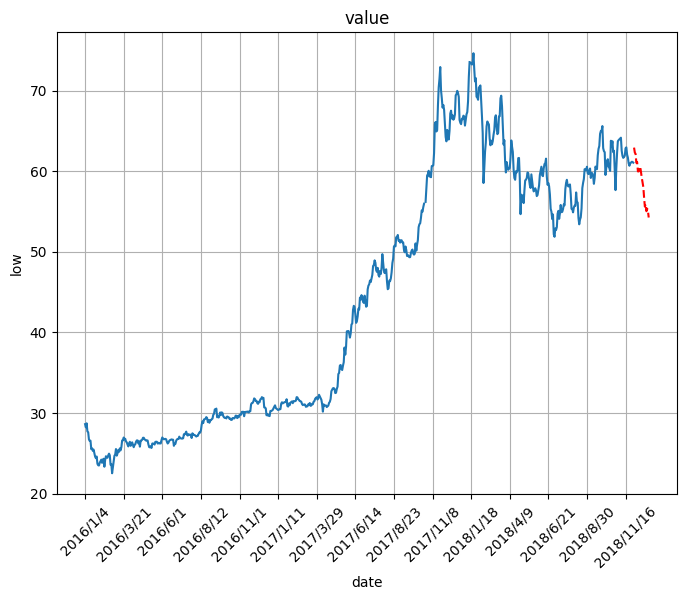

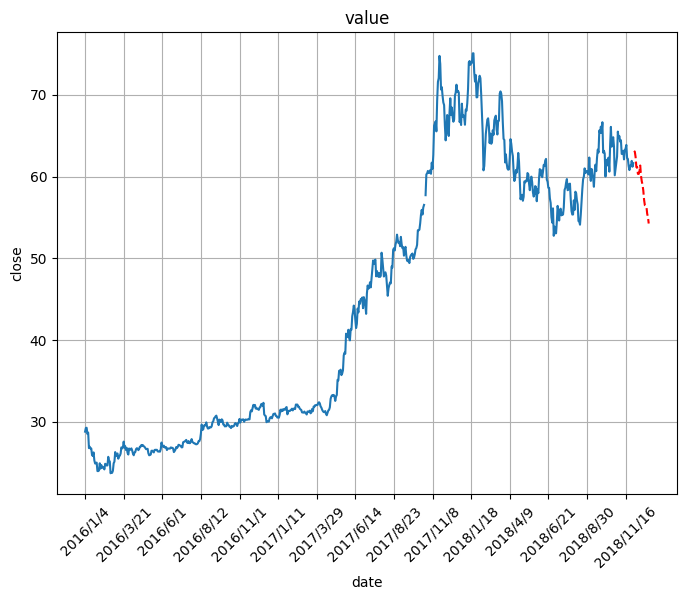

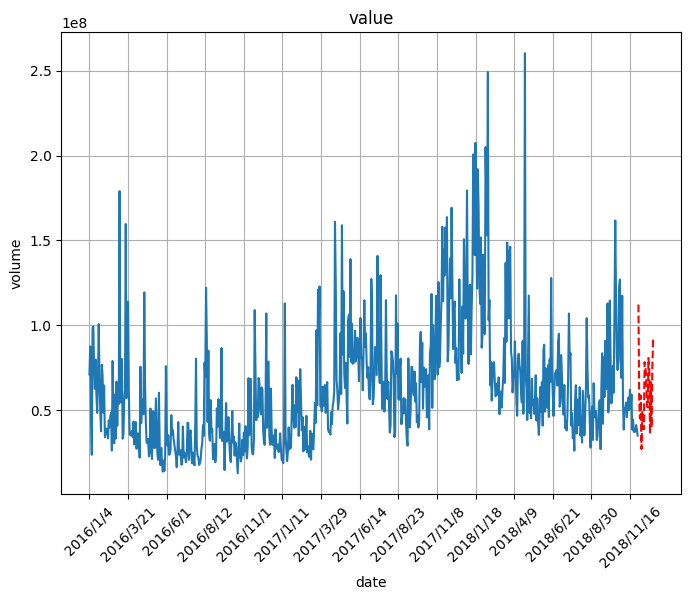

In [6]:
# 画出训练数据的趋势图，观察其趋势特征

selected_features = ['open', 'high', 'low', 'close', 'volume']  # 选择相关特征

def plot_data(col):
    # 提取时间和股票数据
    time = ori_train_data['date']
    ydata = ori_train_data[col]

    # 绘制训练数据折线图
    plt.plot(time, ydata)

    # 绘制测试数据(红色)
    new_time = ori_test_data['date']  # 新的时间数据
    new_open_price = ori_test_data[col]  # 新的开盘价数据
    plt.plot(new_time, new_open_price, color='red', linestyle='--', label='新数据')

    plt.xlabel('date')
    plt.ylabel(col)
    plt.title('value')
    x_ticks = time[::50]  # 每隔50个数据点显示一个标签
    plt.xticks(x_ticks, rotation=45)  # 设置标签和旋转角度

    plt.grid(True)  # 添加网格线
    plt.show()
for col in selected_features:
    #画出每一个股票特征随时间的变化趋势
    plot_data(col)

In [7]:
# 根据上面所看到的训练数据统计数据，我们发现不同特征的count不一致，因此需要处理

# 处理非法值
train_data = ori_train_data.dropna()  # 删除包含缺失值的行
train_data = train_data[(train_data != 0).all(1)]  # 删除包含零值的行

# 特征选择
train_data = train_data[selected_features]
test_data = ori_test_data[selected_features]

# 用于存储最终的预测结果
predict_data = ori_test_data[['date']]


线性回归预测字段：open, R2 分数：0.9778520708599335, MAE:0.3001620745876554, MSE:0.13959870744084707


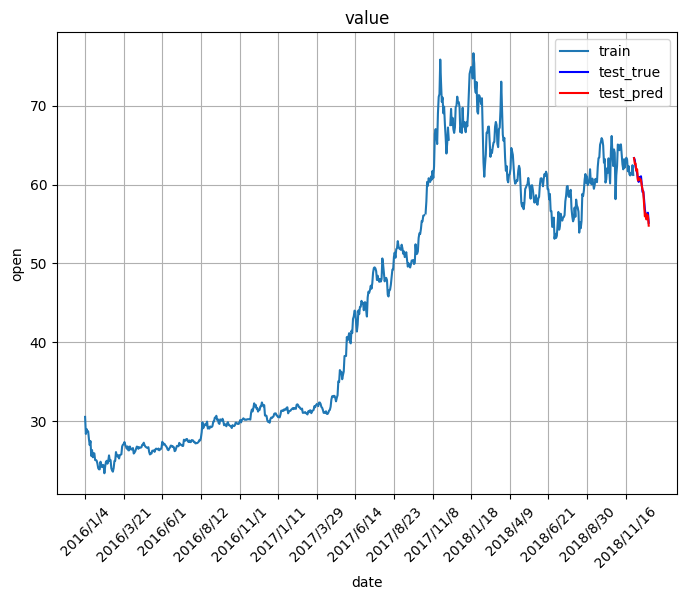

线性回归预测字段：high, R2 分数：0.9837330180735114, MAE:0.2579210873639646, MSE:0.10451068618713064


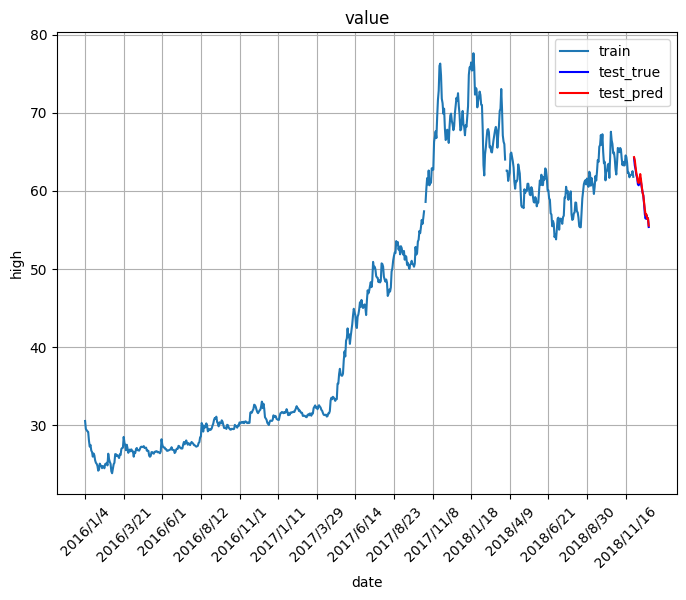

线性回归预测字段：low, R2 分数：0.9889608124068086, MAE:0.23574767205315048, MSE:0.07952534425223383


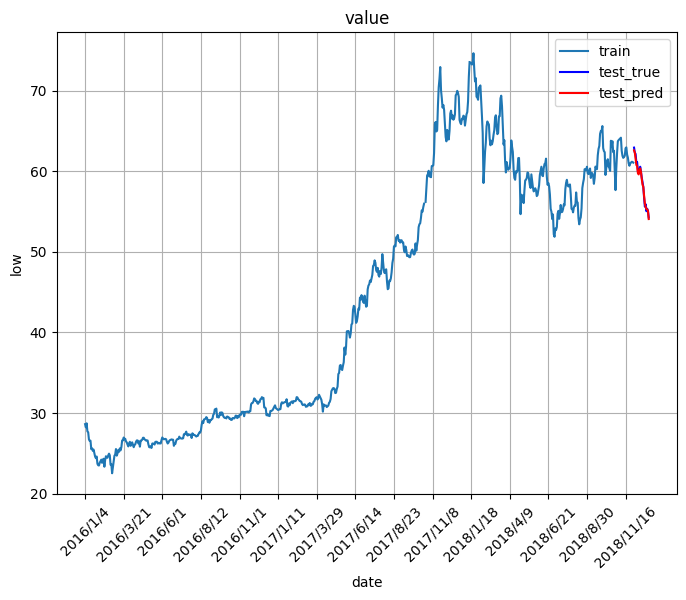

线性回归预测字段：close, R2 分数：0.9899880822329621, MAE:0.22000708351322018, MSE:0.07103875155067846


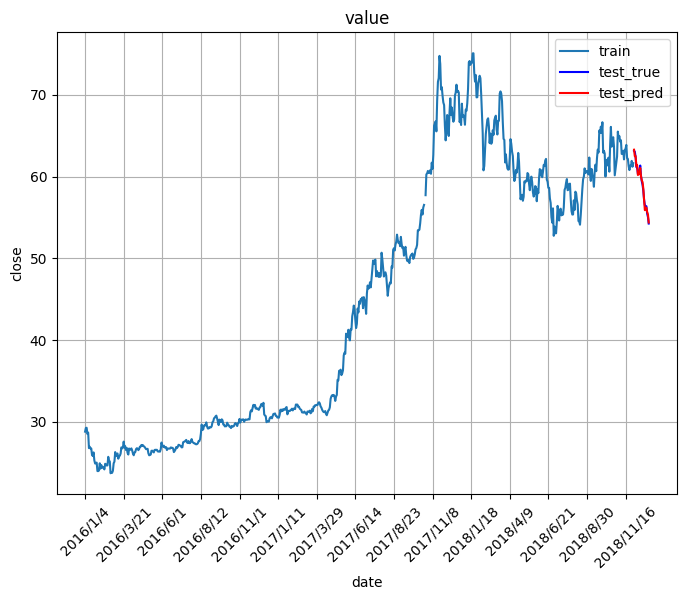

线性回归预测字段：volume, R2 分数：0.31738055491693573, MAE:12918129.659314439, MSE:293393968174110.7


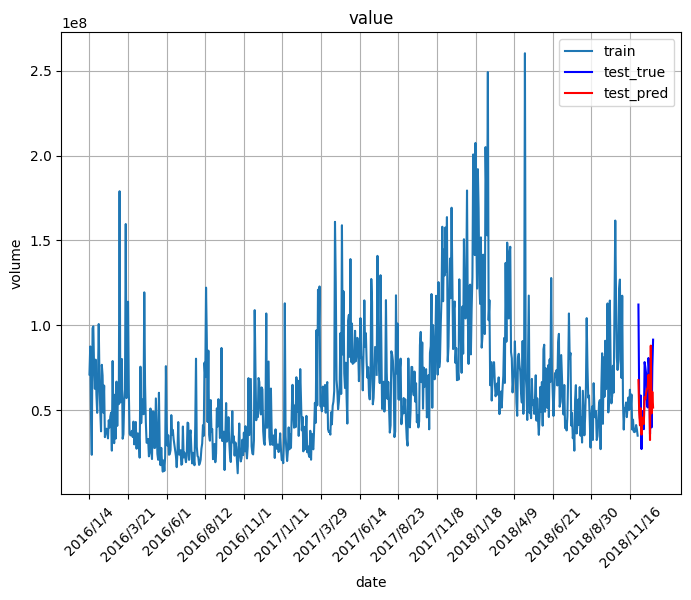

In [11]:
# 使用线性回归模型预测每个特征
# 这里我们把所给训练数据除时间date以外的5个特征的其中之一作为预测值，另外四个作为输入特征进行回归预测
def plot_predict(col, x, ydata, pred):
    # 绘制折线图
    # plt.scatter(self.label_indices, labels[n, :, label_col_index],
    #                 edgecolors='k', label='Labels', c='#2ca02c', s=64)
    # 提取时间和股票数据
    time = ori_train_data['date']
    train_y = ori_train_data[col]

    # 绘制训练数据折线图
    plt.plot(time, train_y,label='train')

    plt.plot(x, ydata, color='blue', label='test_true')
    plt.plot(x, pred, color='red', label='test_pred')

    plt.xlabel('date')
    plt.ylabel(col)
    plt.title('value')
    x_ticks = time[::50]  # 每隔50个数据点显示一个标签
    plt.xticks(x_ticks, rotation=45)  # 设置标签和旋转角度
    
    plt.legend()
    plt.grid(True)  # 添加网格线
    plt.show()

def predict_linear(col):
    # 训练集特征和目标变量
    X_train = train_data[selected_features].drop([col], axis=1)
    y_train = train_data[col]

    # 验证集特征和目标变量
    X_test = test_data[selected_features].drop([col], axis=1)
    y_test = test_data[col]

    # 创建多项式特征
    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # 创建LinearRegression对象并设置参数
    model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
    # 拟合模型
    model.fit(X_train_poly, y_train)

    # 预测验证集
    y_pred = model.predict(X_test_poly)

    # 计算 R2 分数
    r2 = r2_score(y_test, y_pred)

    # 计算 MAE
    mae = mean_absolute_error(y_test, y_pred)

    # 计算 MSE
    mse = mean_squared_error(y_test, y_pred)

    print("线性回归预测字段：{}, R2 分数：{}, MAE:{}, MSE:{}".format(col, r2, mae, mse))

    # 添加预测结果到验证集数据框中
    predict_data[col] = y_pred

    # 画出实际值和预测值的折线图
    plot_predict(col, predict_data['date'], y_test, y_pred)

for col in selected_features:
    predict_linear(col)


In [12]:
# 保存结果到 result.csv 文件
predict_data.to_csv('result.csv', index=False)